## Text Classification with ML


In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy
from bs4 import BeautifulSoup
import re
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mazensalama/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Load Visualization Pkgs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

In [3]:
import os,glob

In [4]:
# Load ML Pkgs
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


#### Combining Dataset

In [5]:
# Find All Dataset from CSV
path = os.path.join("CSV")
all_files = glob.glob(path + "/*.csv")

In [6]:
# Load All Dataset at once
all_df = pd.concat((pd.read_csv(f) for f in all_files))

In [7]:
all_df.head()

,Unnamed: 0,Experience,Personal,LOR,File_Name
0,0,MEDICAL STUDENT PERFORMANCE EVALUATI...,Language FluencyLanguageLanguage ProficiencyPr...,"Swift-Taylor, Mary Elizabeth (12968494)07/11/2...",MSwift-Taylor_12968494_6406f0d8-ecf3-497e-9e98...
1,1,Appendix E !Medical School Information Keck Sc...,MEDICAL STUDENT PERFORMANCE EVALUATI...,I(eck School of MedicineDepartment of Pediatri...,MSwift-Taylor_12968494_6406f0d8-ecf3-497e-9e98...
0,0,"Moore, Morgan (13224044)MyERAS ApplicationUniv...","Moore, Morgan (13224044)MyERAS ApplicationUniv...","Moore, Morgan (13224044)LoR - Rebecca LatchUni...",MMoore_13224044_b74fd233-f414-4d19-bd6b-422581...
1,1,"Moore, Morgan (13224044)MyERAS ApplicationUniv...","Moore, Morgan (13224044)MSPEUniversity of Utah...","Moore, Morgan (13224044)LoR - Rebecca LatchUni...",MMoore_13224044_b74fd233-f414-4d19-bd6b-422581...
2,2,"Moore, Morgan (13224044)Curriculum VitaeUniver...","Moore, Morgan (13224044)MSPEUniversity of Utah...","Moore, Morgan (13224044)LoR - Lanessa BassUniv...",MMoore_13224044_b74fd233-f414-4d19-bd6b-422581...


In [8]:
# Shape
all_df.shape

(1873, 5)

In [9]:
all_df = all_df[[ 'File_Name','Experience', 'Personal', 'LOR']]

In [10]:
# Save All Combined Dataset
all_df.to_csv("All_Combined_Dataset.csv")

#### Reshape Dataset to Have A Target Column

In [11]:
stacked_df = all_df.stack()

In [12]:
stacked_df.head()

0  File_Name     MSwift-Taylor_12968494_6406f0d8-ecf3-497e-9e98...
   Experience              MEDICAL STUDENT PERFORMANCE EVALUATI...
   Personal      Language FluencyLanguageLanguage ProficiencyPr...
   LOR           Swift-Taylor, Mary Elizabeth (12968494)07/11/2...
1  File_Name     MSwift-Taylor_12968494_6406f0d8-ecf3-497e-9e98...
dtype: object

In [13]:
# Reset Index
new_df = stacked_df.reset_index()

In [14]:
# Columns
new_df.columns

Index(['level_0', 'level_1', 0], dtype='object')

In [15]:
new_df.rename(columns={'level_0':'FileID','level_1':'Target',0:'Details'},inplace=True)

In [16]:
new_df.head()

,FileID,Target,Details
0,0,File_Name,MSwift-Taylor_12968494_6406f0d8-ecf3-497e-9e98...
1,0,Experience,MEDICAL STUDENT PERFORMANCE EVALUATI...
2,0,Personal,Language FluencyLanguageLanguage ProficiencyPr...
3,0,LOR,"Swift-Taylor, Mary Elizabeth (12968494)07/11/2..."
4,1,File_Name,MSwift-Taylor_12968494_6406f0d8-ecf3-497e-9e98...


In [17]:
new_df1 = new_df[new_df['Target'] != 'File_Name']

In [18]:
### Save Dataset
new_df1.to_csv("Main_Reshaped_Dataset.csv")

## Text Classification

In [19]:
# Load Dataset
df = pd.read_csv("Main_Reshaped_Dataset.csv")

In [20]:
# Head
df.head()

,Unnamed: 0,FileID,Target,Details
0,1,0,Experience,MEDICAL STUDENT PERFORMANCE EVALUATI...
1,2,0,Personal,Language FluencyLanguageLanguage ProficiencyPr...
2,3,0,LOR,"Swift-Taylor, Mary Elizabeth (12968494)07/11/2..."
3,5,1,Experience,Appendix E !Medical School Information Keck Sc...
4,6,1,Personal,MEDICAL STUDENT PERFORMANCE EVALUATI...


In [21]:
# Shape of Dataset
df.shape

(5619, 4)

In [22]:
# Show Counts of Each Labels
df['Target'].value_counts()

Experience    1873
LOR           1873
Personal      1873
Name: Target, dtype: int64

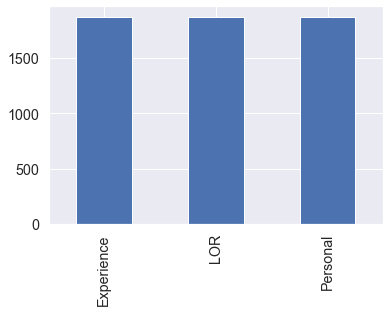

In [23]:
df['Target'].value_counts().plot(kind='bar')

In [79]:
import numpy as np 

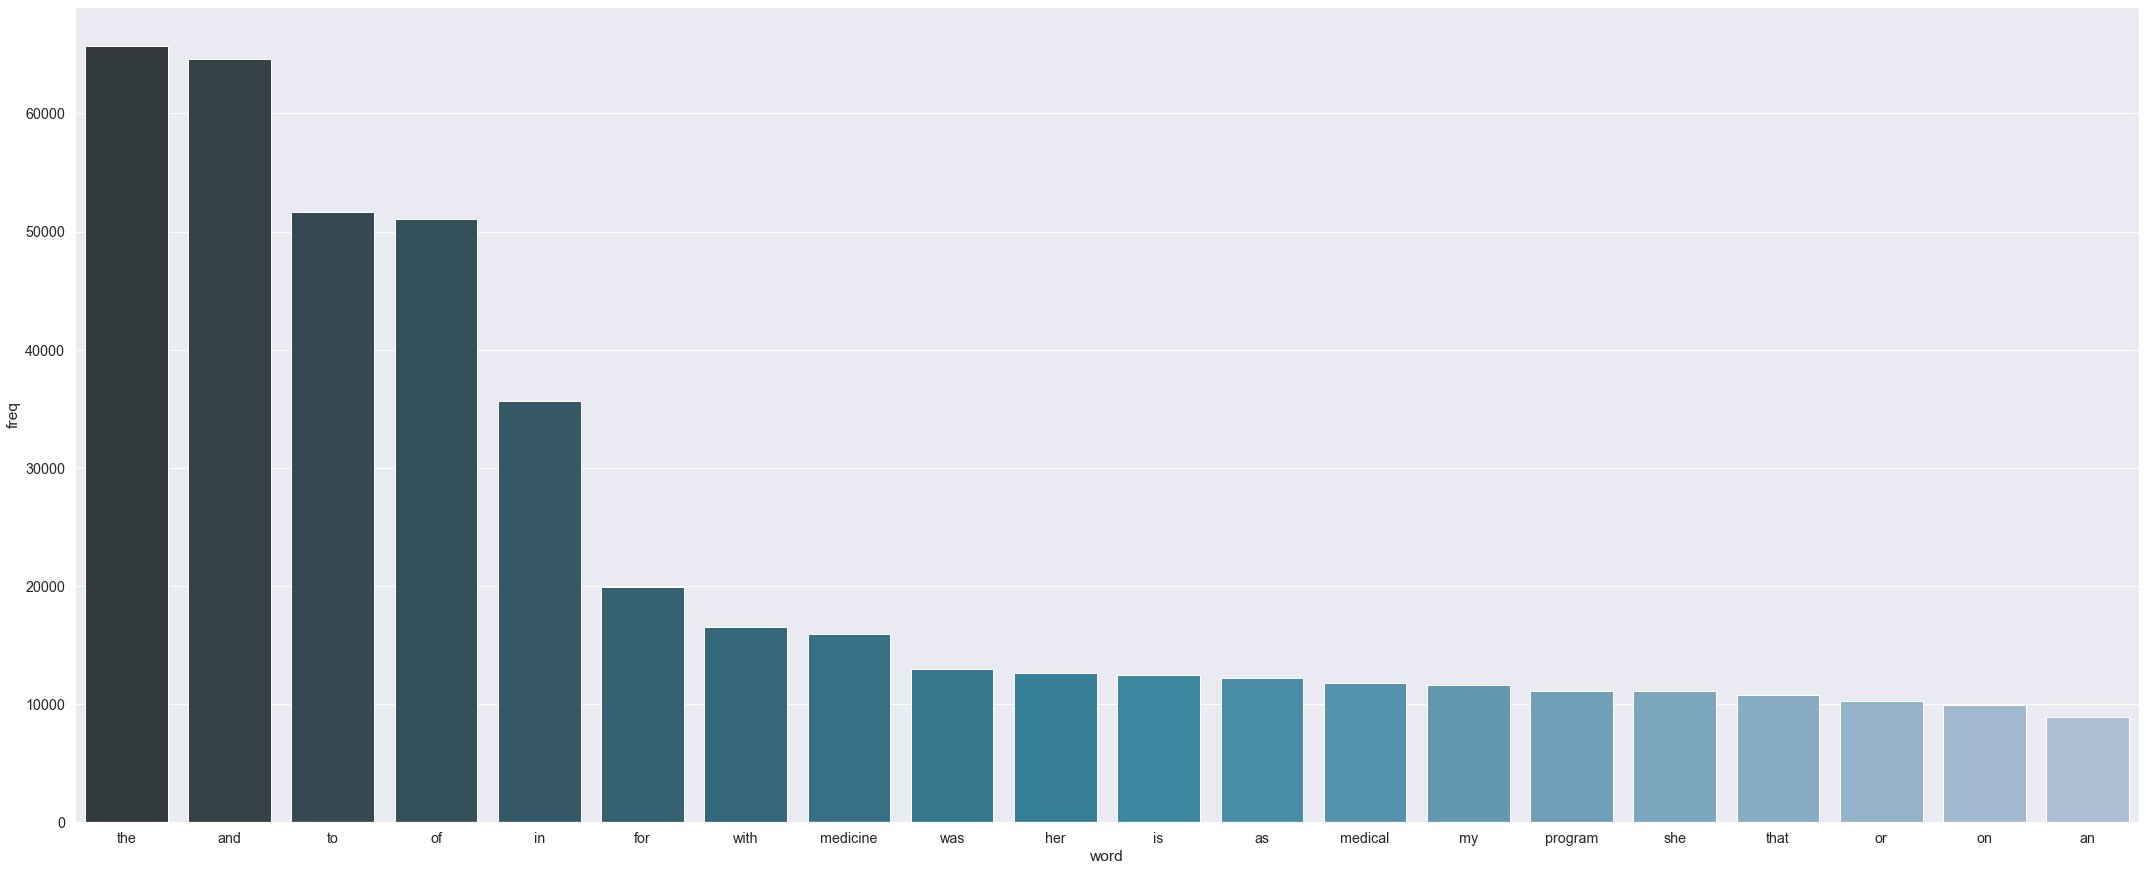

In [80]:
cv = CountVectorizer()
bow = cv.fit_transform(df.Details)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(37, 15))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

In [58]:
df['Target'].unique()

array(['Experience', 'Personal', 'LOR'], dtype=object)

#### Label Encoding Target Column
+ Experience = 1
+ Personal = 2
+ LOR = 3

In [59]:
# Label Encode Target Column
df['Class'] = df['Target'].map({'Experience':1, 'Personal':2, 'LOR':3})

In [60]:
df['Class'].head()

0    1
1    2
2    3
3    1
4    2
Name: Class, dtype: int64

/Users/mazensalama/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mazensalama/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


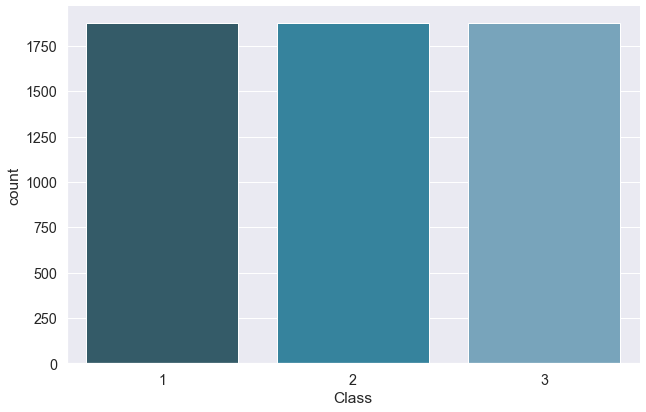

In [61]:
#Visually the new aggregated column
sns.factorplot(x="Class", data=df, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

In [62]:
# Load NLP Pkgs
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mazensalama/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
from nltk.tokenize import RegexpTokenizer

In [81]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ['MyERAS',
             'Application',
             'University',
             'Utah',
             'Program',
             'Page',
             'ERAS',
             'Confidential',
             'Do not disclose',
             'distribute',
             'applicant',
             'information',
             'persons',
             'outside',
             'application process']


In [82]:
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
stop_words = stop_words.union(new_words)

In [83]:
cv = CountVectorizer(lowercase=True,stop_words=stopwords,ngram_range = (1,1),tokenizer = token.tokenize)


#### Split Dataset

In [84]:
# Features and Labels
Ylabels = df['Class']
Xfeatures = df['Details']

In [85]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(Xfeatures, Ylabels, test_size=0.3)

#### Encode the Target Variable

In [86]:
# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

#### Count Vectorization

In [87]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df['Details'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
                vocabulary=None)

In [88]:
# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

#### TFIDF Vectorization


In [89]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['Details'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [90]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(df['Details'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

In [91]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(df['Details'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

#### Functions to Train Model,Save Model and Predict

In [92]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)


#### Function to Save Trained Model

In [93]:
def save_models(classifier,feature_vector_train,label,model_filename):
    classifier.fit(feature_vector_train,label)
    save_model_file = '{}_model.pkl'.format(model_filename)
    joblib.dump(classifier, save_model_file)
    print("Saved model as {}".format(save_model_file))
    
    

#### Using Naive Bayes with Count Vectors
+ Naive bayes is a classification algorithm
+ It is based on the Bayes Theorem with an assumption of independence among #predictors

In [94]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print ("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("NB, CharLevel Vectors: ", accuracy)

NB, Count Vectors:  0.7265717674970344
NB, WordLevel TF-IDF:  0.732502965599051
NB, N-Gram Vectors:  0.7348754448398577
NB, CharLevel Vectors:  0.6927639383155397


#### Using Logistic Regression
+ Logistic regression measures the relationship between the categorical dependent variable and one or more independent 
+ Variables by estimating probabilities using a logistic/sigmoid function.

In [95]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print ("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("LR, CharLevel Vectors: ", accuracy)

/Users/mazensalama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mazensalama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LR, Count Vectors:  0.7295373665480427
LR, WordLevel TF-IDF:  0.7502965599051008
LR, N-Gram Vectors:  0.7568208778173191
LR, CharLevel Vectors:  0.7627520759193357


In [96]:
import warnings
warnings.filterwarnings('ignore')

#### Save Models 

In [97]:
# Load Joblib to Save Model
import joblib

In [98]:
# Save Linear Classifier on Word Level TF IDF Vectors
save_models(linear_model.LogisticRegression(),xtrain_tfidf, train_y,"logiticRegression_CountVectors")

# Save Linear Classifier on Ngram Level TF IDF Vectors
save_models(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y,"logiticRegression_TF_IDF")


# Save Linear Classifier on Character Level TF IDF Vectors
save_models(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y,"logiticRegression_CharLevel")


Saved model as logiticRegression_CountVectors_model.pkl
Saved model as logiticRegression_TF_IDF_model.pkl
Saved model as logiticRegression_CharLevel_model.pkl


#### SVM Algorithm

In [99]:
# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("SVM, N-Gram Vectors: ", accuracy)

SVM, N-Gram Vectors:  0.3262158956109134


#### Boosting Models and Tree Based Algorithms
+ RandomForest
+ XGboost

In [100]:
from sklearn import decomposition, ensemble
import xgboost

In [101]:
# RF on Count Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print ("RF, Count Vectors: ", accuracy)

# RF on Word Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("RF, WordLevel TF-IDF: ", accuracy)


RF, Count Vectors:  0.6957295373665481
RF, WordLevel TF-IDF:  0.7147093712930012


#### Boosting -XGBoost Classifier
+ Boosting models are another type of ensemble models part of tree based models. 
+ Boosting is a machine learning #
+ ensemble meta-algorithm to reduce bias, and also variance in supervised learning, 
+ It is a family of machine learning algorithms that convert weak learners to strong ones.
+ A weak learner is defined to be a classifier that is only slightly correlated with the true classification (it can label examples better than random guessing).

In [102]:
# Extereme Gradient Boosting on Count Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc())
print ("Xgb, Count Vectors: ", accuracy)

# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
print ("Xgb, WordLevel TF-IDF: ", accuracy)

# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc())
print ("Xgb, CharLevel Vectors: ", accuracy)

Xgb, Count Vectors:  0.8143534994068802
Xgb, WordLevel TF-IDF:  0.8072360616844603
Xgb, CharLevel Vectors:  0.7841043890865955


In [104]:
# Save Extereme Gradient Boosting on Count Vectors
save_models(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y,"Extereme Gradient Boosting on Count Vectors")

# Save Extereme Gradient Boosting on Word Level TF IDF Vectors
save_models(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y,"Extereme Gradient Boosting on Word Level TF IDF Vectors")


# Extereme Gradient Boosting on Character Level TF IDF Vectors
save_models(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, "Extereme Gradient Boosting on Character Level TF IDF Vectors")

Saved model as Extereme Gradient Boosting on Count Vectors_model.pkl
Saved model as Extereme Gradient Boosting on Word Level TF IDF Vectors_model.pkl
Saved model as Extereme Gradient Boosting on Character Level TF IDF Vectors_model.pkl


#### Diagnostic Performance of Models

#### Definition of the Terms:
Class Statistics:

+ Classes                                       
+ Population                                    
+ P: Condition positive                          
+ N: Condition negative                          
+ Test outcome positive                          
+ Test outcome negative                          
+ TP: True Positive                              
+ TN: True Negative                              
+ FP: False Positive                             
+ FN: False Negative                             
+ TPR: (Sensitivity, hit rate, recall)           
+ TNR=SPC: (Specificity)                 
+ PPV: Pos Pred Value (Precision)              
+ NPV: Neg Pred Value                            
+ FPR: False-out                         
+ FDR: False Discovery Rate                    
+ FNR: Miss Rate                                 
+ ACC: Accuracy                          
+ F1 score                                    
+ MCC: Matthews correlation coefficient  
+ Informedness                           
+ Markedness                                   
+ Prevalence                                  
+ LR+: Positive likelihood ratio               
+ LR-: Negative likelihood ratio                 
+ DOR: Diagnostic odds ratio                   
+ FOR: False omission rate                       

#### Explanations

##### The diagnostic measures covered  for High Accuracutre ML Model are:
+ 1) accuracy: proportion of test results that are correct
+ 2) sensitivity: proportion of true +ve identified
+ 3) specificity: proportion of true -ve identified
+ 4) positive likelihood: increased probability of true +ve if test +ve
+ 5) negative likelihood: reduced probability of true +ve if test -ve
+ 6) false positive rate: proportion of false +ves in true -ve patients
+ 7) false negative rate: proportion of false -ves in true +ve patients
+ 8) positive predictive value: chance of true +ve if test +ve
+ 9) negative predictive value: chance of true -ve if test -ve
+ 10) precision = positive predictive value
+ 11) recall = sensitivity
+ 12) f1 = (2 * precision * recall) / (precision + recall)

In [52]:
# using Pandas ML
from pandas_ml import ConfusionMatrix

In [53]:
# Function to Check For Performance 
def check_model_performance(classifier, feature_vector_train, label, feature_vector_test,label_test):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    y_predictions = classifier.predict(feature_vector_test)
    our_confusion_matrix = ConfusionMatrix(label_test,y_predictions)
    print(our_confusion_matrix.print_stats())

In [54]:
# For Linear Classifier on Count Vectors
check_model_performance(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count,valid_y)


Confusion Matrix:

Predicted    0    1    2  __all__
Actual                           
0          397  126   41      564
1          152  358   50      560
2           35   37  490      562
__all__    584  521  581     1686


Overall Statistics:

Accuracy: 0.7384341637010676
95% CI: (0.7167561387957921, 0.7592790388849464)
No Information Rate: ToDo
P-Value [Acc > NIR]: 3.446696786439726e-236
Kappa: 0.6076251571291514
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                       0         1          2
Population                                 1686      1686       1686
P: Condition positive                       564       560        562
N: Condition negative                      1122      1126       1124
Test outcome positive                       584       521        581
Test outcome negative                      1102      1165       1105
TP: True Positive                           397       358        490
TN: True Negative                           935

In [55]:
# For Naive Bayes Classifier on Count Vectors
check_model_performance(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,valid_y)


Confusion Matrix:

Predicted    0    1    2  __all__
Actual                           
0          437   87   40      564
1          215  291   54      560
2           27   20  515      562
__all__    679  398  609     1686


Overall Statistics:

Accuracy: 0.7372479240806643
95% CI: (0.7155414108630261, 0.7581254544759766)
No Information Rate: ToDo
P-Value [Acc > NIR]: 1.0830652730727934e-170
Kappa: 0.6057549688519728
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                       0          1          2
Population                                 1686       1686       1686
P: Condition positive                       564        560        562
N: Condition negative                      1122       1126       1124
Test outcome positive                       679        398        609
Test outcome negative                      1007       1288       1077
TP: True Positive                           437        291        515
TN: True Negative                      

In [56]:
# For Extereme Gradient Boosting on Count Vectors
check_model_performance(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc(),valid_y)

Confusion Matrix:

Predicted    0    1    2  __all__
Actual                           
0          440   80   44      564
1          111  402   47      560
2           26   27  509      562
__all__    577  509  600     1686


Overall Statistics:

Accuracy: 0.8013048635824437
95% CI: (0.7814445692989914, 0.8201103905490197)
No Information Rate: ToDo
P-Value [Acc > NIR]: 2.1390224320863164e-307
Kappa: 0.701935904688727
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                       0          1          2
Population                                 1686       1686       1686
P: Condition positive                       564        560        562
N: Condition negative                      1122       1126       1124
Test outcome positive                       577        509        600
Test outcome negative                      1109       1177       1086
TP: True Positive                           440        402        509
TN: True Negative                       

### Applying Deep Learning Models
+ Deep Neural Networks
+ Convolutional Neural Network
+ RNN - Long Short Term Memory(LSTM)
+ RCNN - Recurrent Convolutional Neural Network


#### Shallow Neural Networks
+ Neural network is a mathematical model that is designed to behave similar to biological neurons and the nervous system. 

+ These models are used to recognize complex patterns and relationships that exists within a labelled data.

+ The shallow neural network contains mainly three types of layers 

 - Input layer

 - Hidden layer
 
 - Output layer

#### Deep Neural Networks

+ Deep Neural Networks are more complex neural networks in which the hidden layers performs extrem and 
+ more complex operations than the simple sigmoid or relu activations.

In [57]:
# Load DL Pkgs
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from keras.layers import Input
import tensorflow
from tensorflow.keras.layers import Input

Using TensorFlow backend.


In [58]:
# load the pre-trained word-embedding vectors 
#300d-1M.vec
embeddings_index = {}
for i, line in enumerate(open('300d-1M.vec')):
    values = line.split()
    embeddings_index[values[0]] = numpy.asarray(values[1:], dtype='float32')

# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(df['Details'])
word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=70)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x), maxlen=70)

# create token-embedding mapping
embedding_matrix = numpy.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [61]:
def create_model_architecture(input_size):
    # create input layer 
    input_layer = layers.Input((input_size, ), sparse=True)
    
    # create hidden layer
    hidden_layer = layers.Dense(100, activation="relu")(input_layer)
    
    # create output layer
    output_layer = layers.Dense(1, activation="sigmoid")(hidden_layer)

    classifier = models.Model(inputs = input_layer, outputs = output_layer)
    classifier.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    return classifier 

In [62]:
classifier = create_model_architecture(xtrain_tfidf_ngram.shape[1])
accuracy = train_model(classifier, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, is_neural_net=True)
print ("NN, Ngram Level TF IDF Vectors",  accuracy)

Epoch 1/1


ValueError: setting an array element with a sequence.

### CNN Deep Learning Model
+ In the Convolutional neural networks, convolutions over the input layer are used to compute the output.
+ This results in local connections, where each region of the input is connected to a neuron in the output. 
+ Each layer applies different filters and combines their results.

In [63]:
def create_cnn():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the convolutional Layer
    conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

    # Add the pooling Layer
    pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

In [64]:
classifier = create_cnn()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print ("CNN, Word Embeddings",  accuracy)

Epoch 1/1
3933/3933 [==============================] - 1s 306us/step - loss: -8.4441
CNN, Word Embeddings 0.33451957295373663


### RNN  Recurrent Neural Network – LSTM

+ Feed-forward neural networks in which activation outputs are propagated only in one direction, the activation #outputs from neurons propagate in both directions (from inputs to outputs and from outputs to inputs) in Recurrent #Neural Networks. Which creates loops in the neural network architecture which acts as a ‘memory state’ of the neurons. This state #allows the neurons an ability to remember what have been learned so far.

+ The memory state in RNNs gives an advantage over traditional neural networks but a problem called Vanishing Gradient #is associated with them. In this problem, while learning with a large number of layers, it becomes really hard for #the network to learn and tune the parameters of the earlier layers. 

+ To address this problem, A new type of RNNs called LSTMs (Long Short Term Memory) Models have been developed.

In [65]:
 def create_rnn_lstm():

    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = layers.LSTM(100)(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_rnn_lstm()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print ("RNN-LSTM, Word Embeddings",  accuracy)

Epoch 1/1
3933/3933 [==============================] - 7s 2ms/step - loss: -3.9096
RNN-LSTM, Word Embeddings 0.33451957295373663


### RNN - Gated Recurrent Units
+ The Gated Recurrent Units are another form of recurrent neural networks.We will  add a layer of GRU instead of LSTM in our network.

In [66]:
def create_rnn_gru():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the GRU Layer
    lstm_layer = layers.GRU(100)(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_rnn_gru()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print ("RNN-GRU, Word Embeddings",  accuracy)

Epoch 1/1
3933/3933 [==============================] - 10s 2ms/step - loss: -4.3614
RNN-GRU, Word Embeddings 0.33451957295373663


### Bidirectional RNN
+ RNN layers can be wrapped in Bidirectional layers as well. 

In [67]:
def create_bidirectional_rnn():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = layers.Bidirectional(layers.GRU(100))(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_bidirectional_rnn()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print ("RNN-Bidirectional, Word Embeddings",  accuracy)

Epoch 1/1
3933/3933 [==============================] - 14s 3ms/step - loss: -9.7387
RNN-Bidirectional, Word Embeddings 0.33451957295373663


### Recurrent Convolutional Neural Network

As the essential architectures have been tried out, We can try different variants of these layers such as recurrent convolutional neural network. Another variants can be:

- Hierarichial Attention Networks

- Sequence to Sequence Models with Attention

- Bidirectional Recurrent Convolutional Neural Networks

- CNNs and RNNs with more number of layers

In [68]:
def create_rcnn():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)
    
    # Add the recurrent layer
    rnn_layer = layers.Bidirectional(layers.GRU(50, return_sequences=True))(embedding_layer)
    
    # Add the convolutional Layer
    conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

    # Add the pooling Layer
    pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_rcnn()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print ("CNN, Word Embeddings",  accuracy)


Epoch 1/1
3933/3933 [==============================] - 1s 321us/step - loss: -10.6859
CNN, Word Embeddings 0.33451957295373663


#### Function to Generate Tokens

In [69]:
# Load NLP pkgs
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords

In [70]:
# Function to Tokenize
def custom_tokenizer(data):
    mytokens = word_tokenize(data)
    filtered_sent = [ w for w in mytokens if not w in stop_words]
    return filtered_sent

#### Function to Generate vectors file tf-idf based vectors

In [71]:
#
from sklearn.feature_extraction.text import TfidfVectorizer

# tf-idf based vectors
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2), stop_words = "english", lowercase = True, max_features = 500000)

# Fit the model
tf_transformer = tf.fit(df['Details'])

# Dump the file
pickle.dump(tf_transformer, open("tfidf1.pkl", "wb"))




In [72]:
# Testing phase
tf1 = pickle.load(open("tfidf1.pkl", 'rb'))

# Create new tfidfVectorizer with old vocabulary
tf1_new = TfidfVectorizer(analyzer='word', ngram_range=(1,2), stop_words = "english", lowercase = True,
                          max_features = 500000, vocabulary = tf1.vocabulary_)
X_tf1 = tf1_new.fit_transform(new_corpus)

NameError: name 'new_corpus' is not defined

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.externals import joblib

In [107]:
import nltk
import string
df = pd.read_csv("Main_Reshaped_Dataset.csv")
reader = (df['Details'])

In [108]:
data = [
    [(word.replace(",", "")
          .replace(".", "")
          .replace("(", "")
          .replace(")", ""))
    for word in row[2].lower().split()]
    for row in reader]    
  #Removes header

In [109]:
  def computeReviewTFDict(review):
    """ Returns a tf dictionary for each review whose keys are all 
    the unique words in the review and whose values are their 
    corresponding tf.
    """
    #Counts the number of times the word appears in review
    reviewTFDict = {}
    for word in review:
        if word in reviewTFDict:
            reviewTFDict[word] += 1
        else:
            reviewTFDict[word] = 1
    #Computes tf for each word           
    for word in reviewTFDict:
        reviewTFDict[word] = reviewTFDict[word] / len(review)
    return reviewTFDict
tfDict[0]

NameError: name 'tfDict' is not defined

In [100]:
  def computeCountDict():
    """ Returns a dictionary whose keys are all the unique words in
    the dataset and whose values count the number of reviews in which
    the word appears.
    """
    countDict = {}
    # Run through each review's tf dictionary and increment countDict's (word, doc) pair
    for review in tfDict:
        for word in review:
            if word in countDict:
                countDict[word] += 1
            else:
                countDict[word] = 1
    return countDict

  #Stores the review count dictionary
  countDict = computeCountDict()

NameError: name 'tfDict' is not defined

In [81]:
def vectorize(doc):
    return {
        token: True
        for token in doc
    }

vectors = map(vectorize, corpus)

In [82]:
from sklearn.preprocessing import Binarizer

freq   = CountVectorizer()
corpus = freq.fit_transform(corpus)

onehot = Binarizer()
corpus = onehot.fit_transform(corpus.toarray())

AttributeError: 'generator' object has no attribute 'lower'

In [83]:
corpus  = [tokenize(doc) for doc in corpus]
id2word = gensim.corpora.Dictionary(corpus)
vectors = [
    [(token[0], 1) for token in id2word.doc2bow(doc)]
    for doc in corpus
]

AttributeError: 'generator' object has no attribute 'lower'